 # <center> Interpolazione 1D e Uncertainty Evaluation</center>

In [1]:
import pandas as pd
import numpy as np 
import scipy as smp
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#import scienceplots
#plt.style.use(['science','notebook'])

In [2]:
dfg=pd.read_excel('Datas.xlsx')
dfg.columns=[r"Reg(cm)","Shim(digit)","initial_Reg","initial_shim","Diff. $\rho$","Int. $\rho$","Time","STD_Time $\sigma$"]
dfg

,Reg(cm),Shim(digit),initial_Reg,initial_shim,Diff. $\rho$,Int. $\rho$,Time,STD_Time $\sigma$
0,12.589565,548,258,356,0.001474,0.002516,14.730000,1.373806
1,15.736957,518,356,413,0.001002,0.003518,26.193000,1.112965
2,18.111304,496,413,456,0.000711,0.004228,41.381000,0.903025
3,20.099130,481,456,492,0.000656,0.004884,45.790000,1.711198
4,24.571739,465,492,573,0.001543,0.006427,13.683333,1.039359
5,28.989130,435,573,653,0.001166,0.007593,21.093750,1.064907
6,34.731739,410,653,757,0.000907,0.008501,30.006250,1.821780
7,38.100000,389,757,818,0.000164,0.008665,220.750000,16.875595


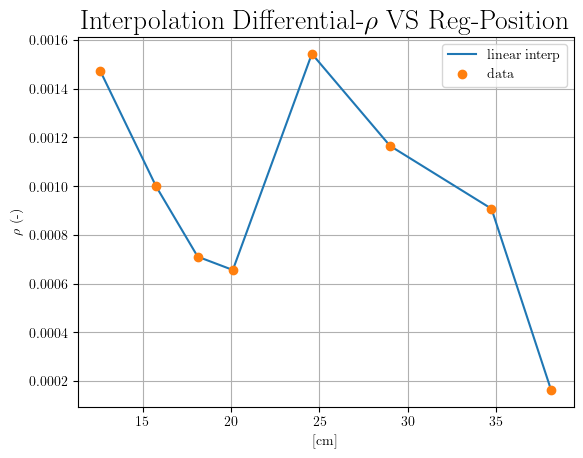

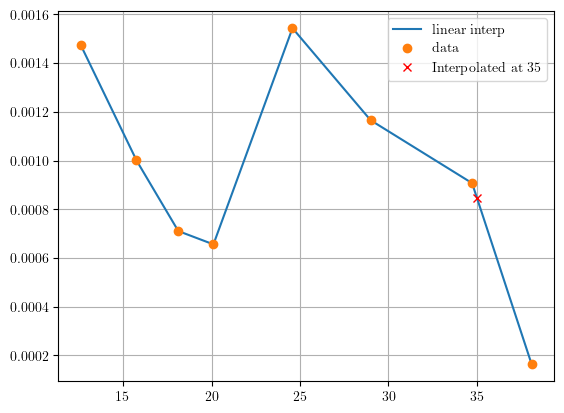

In [3]:
x = dfg.iloc[:,0]
y = dfg.iloc[:,4]

xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew = np.interp(xnew, x, y)

plt.title(r'Interpolation Differential-$\rho$ VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$\rho$ (-)')
plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 35
specific_y = np.interp(specific_x, x, y)

plt.plot(xnew, ynew, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(specific_x, specific_y, 'rx', label=f'Interpolated at {specific_x}')
plt.legend(loc='best')
plt.grid()
plt.show()

In [4]:
gamma=dfg.iloc[0,0]
zeet=dfg.iloc[-1,0]
zeet

38.1

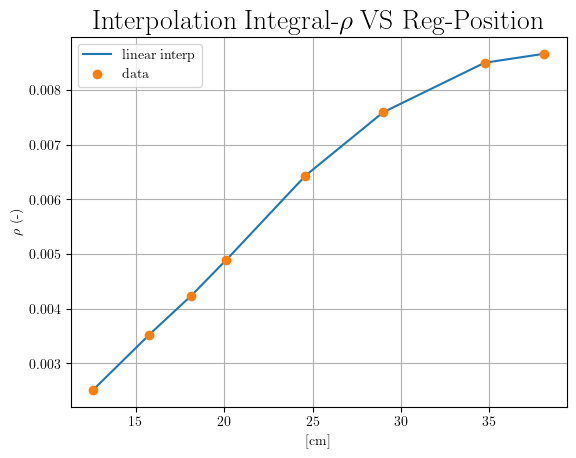

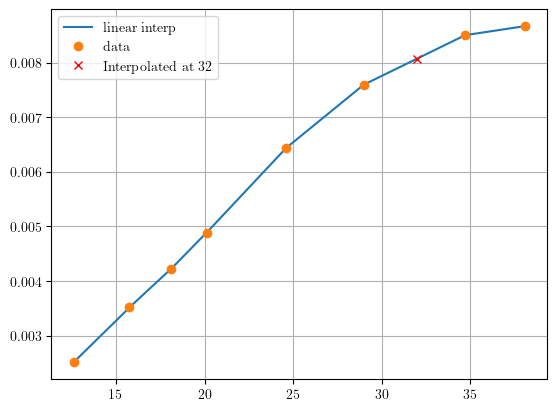

In [5]:
x = dfg.iloc[:,0]
y = dfg.iloc[:,5]

xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew_Irho = np.interp(xnew, x, y)

plt.title(r'Interpolation Integral-$\rho$ VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$\rho$ (-)')
plt.plot(xnew, ynew_Irho, '-', label='linear interp')
plt.plot(x, y,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 32
specific_y = np.interp(specific_x, x, y)

plt.plot(xnew, ynew_Irho, '-', label='linear interp')
plt.plot(x, y, 'o', label='data')
plt.plot(specific_x, specific_y, 'rx', label=f'Interpolated at {specific_x}')
plt.legend(loc='best')
plt.grid()
plt.show()

 # inteprolare la funzione del tempo in modo tale che il numero di elementi matcha sia per la funzione del tempo che la funzione delle $\rho$

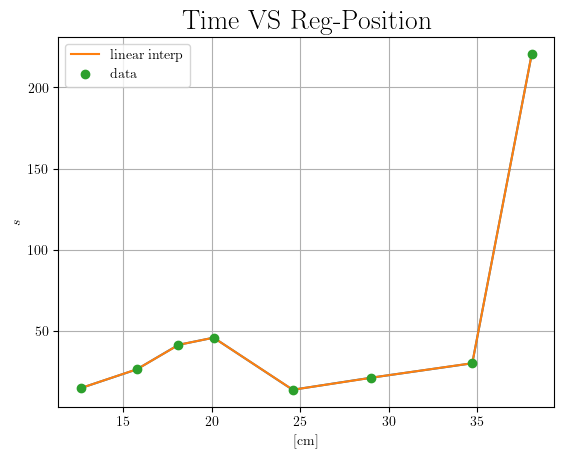

In [6]:
T=dfg.iloc[:,6]
plt.plot(x,T)

x = dfg.iloc[:,0]
yT = dfg.iloc[:,6]

xnewT = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001)
ynew_T = np.interp(xnewT, x, yT)

plt.title(r'Time VS Reg-Position',size=20)
plt.xlabel('[cm]')
plt.ylabel(r'$s$')
plt.plot(xnewT, ynew_T, '-', label='linear interp')
plt.plot(x, yT,'o', label='data')
plt.legend(loc='best')
plt.grid()
plt.show()

specific_x = 35
specific_y = np.interp(specific_x, x, yT)

# <center> Valutazione dell'errore </center>

---

Bisogna calcolare il valore dell'incertezza totale della misura cioè $\delta R$<br>
In questo caso abbiamo che la variabile $R$ corrisponde alla reattività $\rho$, mentre la variabile di incertezza è $T$ cioè il tempo.
$$\delta R=\bigg \{\sum^{N}_{i=0} \bigg(\frac{\partial R}{\partial X_i} \delta X_i\bigg)^2 \bigg\}^{1/2}$$
Il valore delle barre di errore per singola misura è 
$$\delta R_i= \frac{\partial R}{\partial X_i} \delta X_i$$
---

Uso come variabili :<br>
$\verb|drdt|=\frac{\partial R}{\partial X_i}$<br>
$\verb|drdtdt|=\frac{\partial R}{\partial X_i} \delta X_i$<br>
$\verb|dr|=\bigg \{\sum^{N}_{i=0} \bigg(\frac{\partial R}{\partial X_i} \delta X_i\bigg)^2 \bigg\}^{1/2}$



In [7]:
drdt=np.gradient(dfg["Int. $\rho$"],dfg["Time"])
drdt

array([8.73881664e-05, 6.99264025e-05, 1.25837758e-04, 1.80120402e-04,
       2.18911538e-04, 1.32109126e-04, 9.73159152e-05, 8.61346458e-07])

In [8]:
drdtdt=drdt*2*dfg["STD_Time $\sigma$"]
dr=np.sqrt(np.sum((drdtdt)**2))
drdtdt

0    0.000240
1    0.000156
2    0.000227
3    0.000616
4    0.000455
5    0.000281
6    0.000355
7    0.000029
Name: STD_Time $\sigma$, dtype: float64

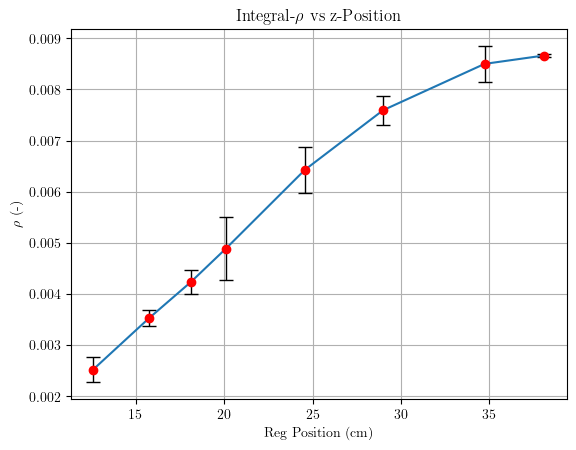

In [9]:
y_err=drdtdt
plt.errorbar(x, y,yerr=y_err,ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,fmt='o',label='Error bar',color='r')
plt.title(r'Integral-$\rho$ vs z-Position')
plt.xlabel('Reg Position (cm)')
plt.ylabel(r'$\rho$ (-)')
plt.plot(dfg["Reg(cm)"], dfg["Int. $\rho$"], label='data')
plt.grid()

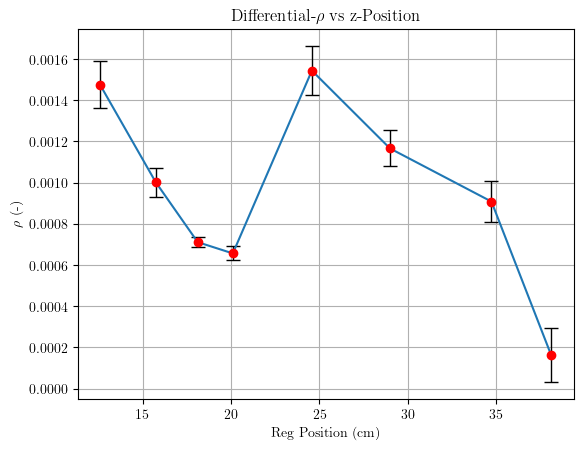

In [10]:
drdt=np.gradient(dfg["Diff. $\rho$"],dfg["Time"])
drdt

drdtdt=drdt*2*dfg["STD_Time $\sigma$"]
dr=np.sqrt(np.sum((drdtdt)**2))
drdtdt

y_err=drdtdt
plt.errorbar(dfg["Reg(cm)"], dfg["Diff. $\rho$"],yerr=y_err,ecolor = 'k',elinewidth = 1, capsize=5,markeredgewidth=1,fmt='o',label='Error bar',color='r')
plt.title(r'Differential-$\rho$ vs z-Position')
plt.xlabel('Reg Position (cm)')
plt.ylabel(r'$\rho$ (-)')
plt.plot(dfg["Reg(cm)"], dfg["Diff. $\rho$"], label='data')
plt.grid()

Interpolazione con cubic-spline

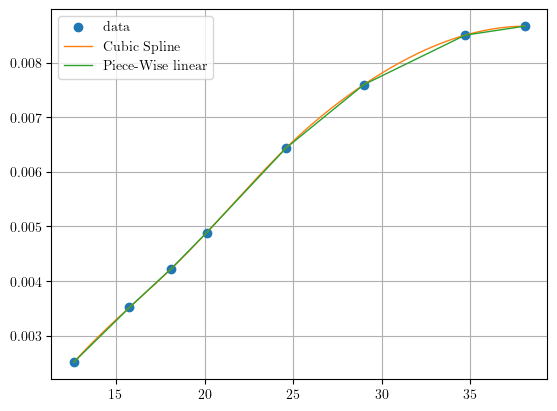

In [11]:
from scipy.interpolate import interp1d
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(dfg.iloc[0,0], dfg.iloc[-1,0], num=1001, endpoint=True)
plt.plot(x, y, 'o', label="data")
plt.plot(xnew, f2(xnew), '-',lw=1,label="Cubic Spline")
#plt.plot(x,y,lw=1,label="normal plot")
plt.plot(xnew, ynew_Irho, '-', lw=1,label='Piece-Wise linear')
plt.legend()
plt.grid()

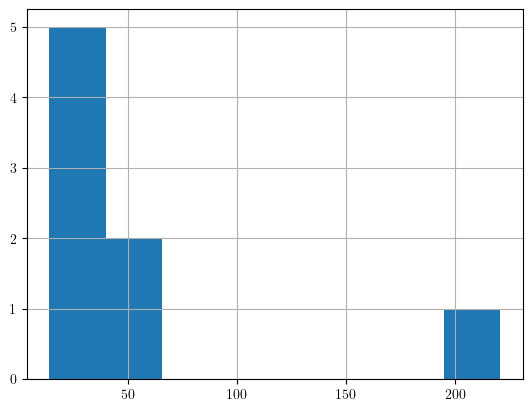

In [12]:
import seaborn as sns
plt.hist(dfg.iloc[:,6], bins=8)
plt.grid()


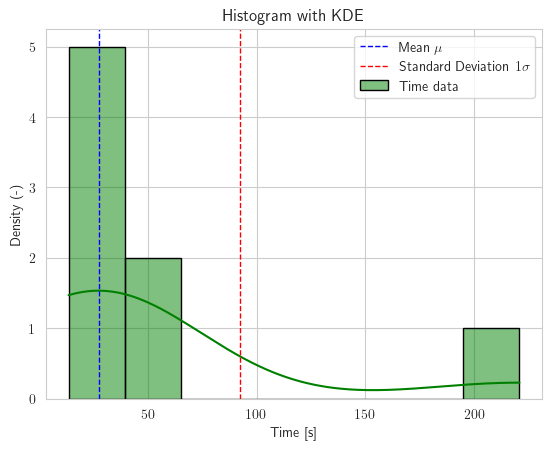

In [13]:
data = dfg.iloc[:, 6]
sns.set_style("whitegrid")
ax = sns.histplot(data, bins=8, kde=True, color='g', edgecolor='black',label="Time data")
std_dev = np.std(data)
mean=np.mean(dfg.iloc[:-1,6])
# Add labels, title, and grid
plt.xlabel('Time [s]')
plt.ylabel('Density (-)')
plt.title('Histogram with KDE')
plt.axvline(mean, color='blue', linestyle='--', linewidth=1,label=r"Mean $\mu$")
plt.axvline(mean+std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $1 \sigma$")
plt.legend()
# Show the plot
plt.show()

----
Test

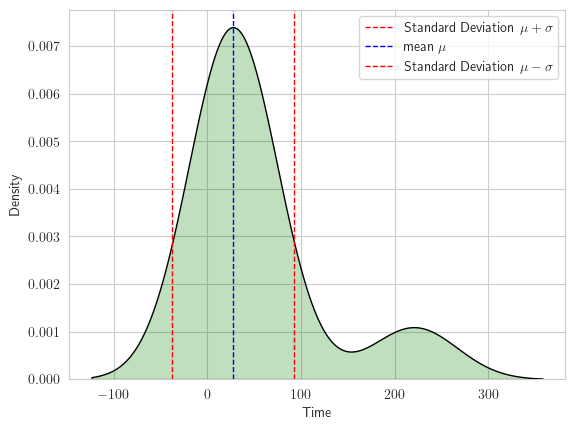

In [14]:
sns.set_style("whitegrid")
#sns.displot(x=dfg.iloc[:,6], kind="kde")
sns.kdeplot(x=dfg.iloc[:,6], color='g', fill=True, edgecolor='black')
plt.axvline(mean+std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $\mu+\sigma$")
plt.axvline(mean, color='blue', linestyle='--', linewidth=1,label=r"mean $\mu$")
plt.axvline(mean-std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $\mu -\sigma$")
#sns.displot(x=dfg.iloc[:,6], bins=8)
plt.legend()
plt.show()

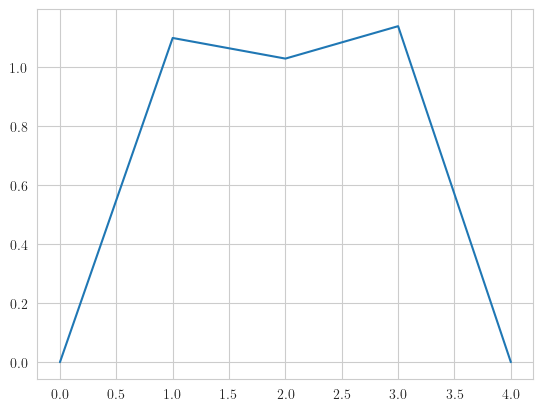

In [15]:
from scipy.stats import rv_histogram
import numpy as np

gg = np.random.random(10000)
r = rv_histogram(np.histogram(gg, bins=100))
gamma=r.pdf(np.linspace(0,1,5))

#plt.plot(gg)
plt.plot(gamma)

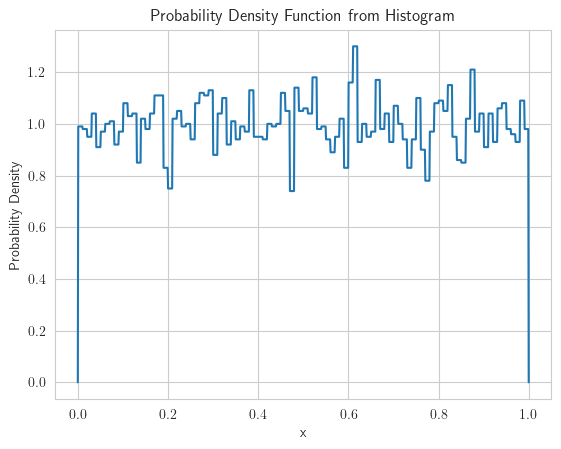

In [16]:
import matplotlib.pyplot as plt
from scipy.stats import rv_histogram
import numpy as np

# Generate random data
gg = np.random.random(10000)

# Create a histogram
hist, bins = np.histogram(gg, bins=100)

# Create a probability density function using rv_histogram
r = rv_histogram((hist, bins))

# Evaluate the pdf at specified points
x_values = np.linspace(0, 1, 1000)
gamma = r.pdf(x_values)

# Plot the gamma values
plt.plot(x_values, gamma)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Probability Density Function from Histogram')
plt.show()


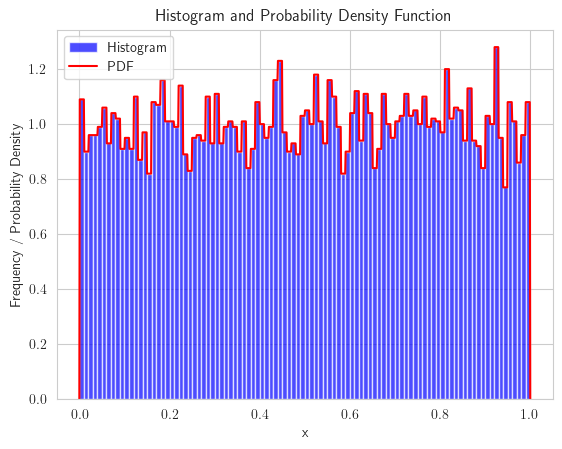

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rv_histogram

# Generate random data
gg = np.random.random(10000)

# Create a histogram
hist, bins = np.histogram(gg, bins=100)

# Create a probability density function using rv_histogram
r = rv_histogram((hist, bins))

# Evaluate the pdf at specified points
x_values = np.linspace(0, 1, 1000)
gamma = r.pdf(x_values)

# Plot the histogram
plt.hist(gg, bins=100, density=True, alpha=0.7, color='blue', label='Histogram')

# Plot the probability density function
plt.plot(x_values, gamma, color='red', label='PDF')

plt.xlabel('x')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram and Probability Density Function')
plt.legend()
plt.show()


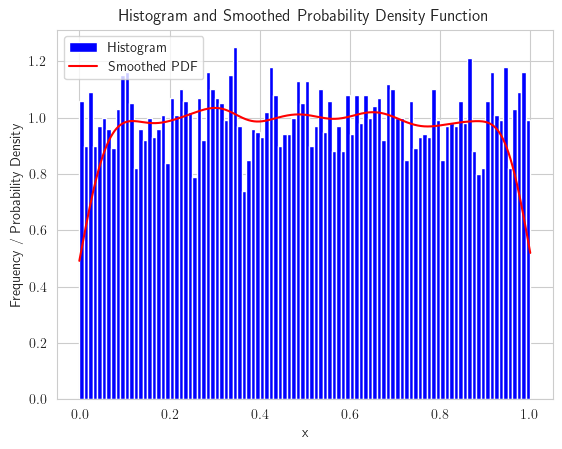

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Generate random data
gg = np.random.random(10000)

# Create a kernel density estimation
kde = gaussian_kde(gg)

# Evaluate the KDE at specified points
x_values = np.linspace(0, 1, 1000)
smoothed_gamma = kde(x_values)

# Plot the histogram
plt.hist(gg, bins=100, density=True, alpha=1, color='blue', label='Histogram')

# Plot the smoothed probability density function
plt.plot(x_values, smoothed_gamma, color='red', label='Smoothed PDF')

plt.xlabel('x')
plt.ylabel('Frequency / Probability Density')
plt.title('Histogram and Smoothed Probability Density Function')
plt.legend()
plt.show()


Fine test

---

# Probability Density Function (PDF)
Metodo alternativo per la PDF

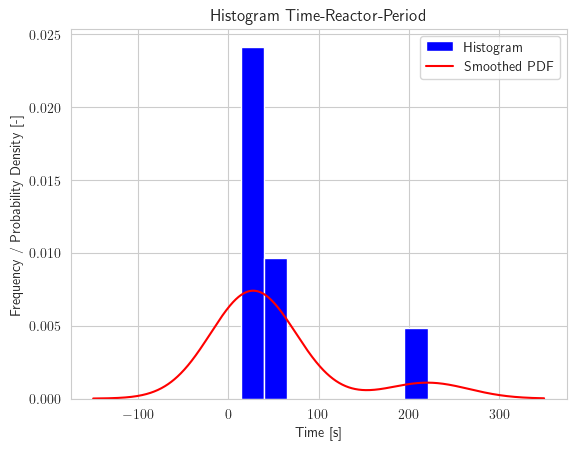

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Generate random data
gg = data

# Create a kernel density estimation
kde = gaussian_kde(gg)

# Evaluate the KDE at specified points
x_values = np.linspace(-150, 350, 1000)
smoothed_gamma = kde(x_values)

# Plot the histogram
plt.hist(gg, bins=8, density=True, alpha=1, color='blue', label='Histogram')

# Plot the smoothed probability density function
plt.plot(x_values, smoothed_gamma, color='red', label='Smoothed PDF')

plt.xlabel('Time [s]')
plt.ylabel('Frequency / Probability Density [-]')
plt.title('Histogram Time-Reactor-Period')
plt.legend()
plt.show()

Assumendo una distribuzione normale:

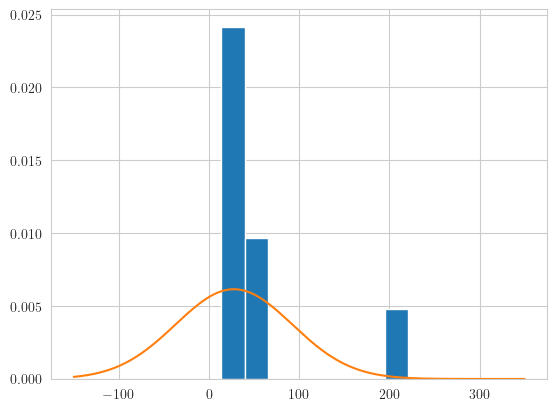

In [20]:
from scipy.stats import norm
sample_mean=mean
sample_std=std_dev
dist = norm(sample_mean, sample_std)
probabilities = dist.pdf(x_values)
plt.hist(dfg.iloc[:,6], bins=8, density=True)
plt.plot(x_values, probabilities)
plt.show()

Using RAW  data del Time reactor period:

Costruzione della probability density function, normalizzata, altrimenti la probability density function veniva schiacchiata dalla scala dell'istogramma. Questo è un probabile grafico finale

In [21]:
sample=np.array([25.79, 25.76, 27, 25.45, 25.9,
                  16.07, 16.49, 15.15, 16.14,
                  26.84, 27.59, 27.76, 26.21, 27.17,
                  42.37, 42.6, 40.92, 42.45, 42.08, 47,
                  14.7, 14.61, 14.58,
                  21.7, 22.17, 22.15, 22.19,
                  31.58, 31.84, 31.3, 31.56,
                  237, 237, 235, 237])
len(sample)

35

per una distribuzione che non è gaussiana:

In [22]:
mean1=np.mean(sample)
std_dev1 = np.std(sample) #Deviazione standard
q3=np.percentile(sample, 75) #terzo quartile
q1 = np.percentile(sample, 25)
IQR1=q3-q1
outl1=q3+1.5*IQR1 #outlier
outl1
mean1

51.17485714285715

per una distribuzione che è gaussiana

In [23]:
std_dev = np.std(data) #Deviazione standard
Q3=0.6745*std_dev #terzo quartile
Q1=-0.6745*std_dev
IQR=Q3-Q1
outl=Q3+1.5*IQR #outlier
std_dev

64.79711460510853

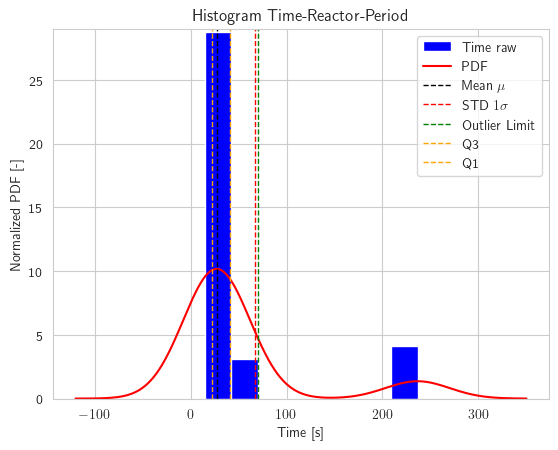

In [24]:
#dati sample
gg = sample

# Create a kernel density estimation
kde = gaussian_kde(gg)

# Evaluate the KDE at specified points
x_values = np.linspace(-120, 350, 1000)
smoothed_gamma = kde(x_values)

# Plot the histogram
plt.hist(gg, bins=8, density=True, alpha=1, color='blue', label='Time raw')

# Plot the smoothed probability density function
plt.plot(x_values, smoothed_gamma, color='red', label='PDF') #PDF=probability density function
plt.axvline(mean, color='black', linestyle='--', linewidth=1,label=r"Mean $\mu$")
plt.axvline(std_dev1, color='red', linestyle='--', linewidth=1,label=r"STD $1 \sigma$")
plt.axvline(outl1, color='green', linestyle='--', linewidth=1,label=r"Outlier Limit")
plt.axvline(q3, color='orange', linestyle='--', linewidth=1,label=r"Q3")
plt.axvline(q1, color='orange', linestyle='--', linewidth=1,label=r"Q1")
plt.xlabel('Time [s]')
plt.ylabel('Normalized PDF [-]')
plt.title('Histogram Time-Reactor-Period')
plt.legend()
labely = ['0','5','10' ,'15','20','25','30'] #ho moltiplicato x1000 la scala delle y
y=[0.000,0.005,0.010,0.015,0.020,0.025,0.030]               #punti in cui posizionare le nomenclature di "labely"
plt.yticks(y, labely)
plt.ylim(0, 0.029)
#plt.savefig('Hist.pdf', format='pdf')
plt.show()


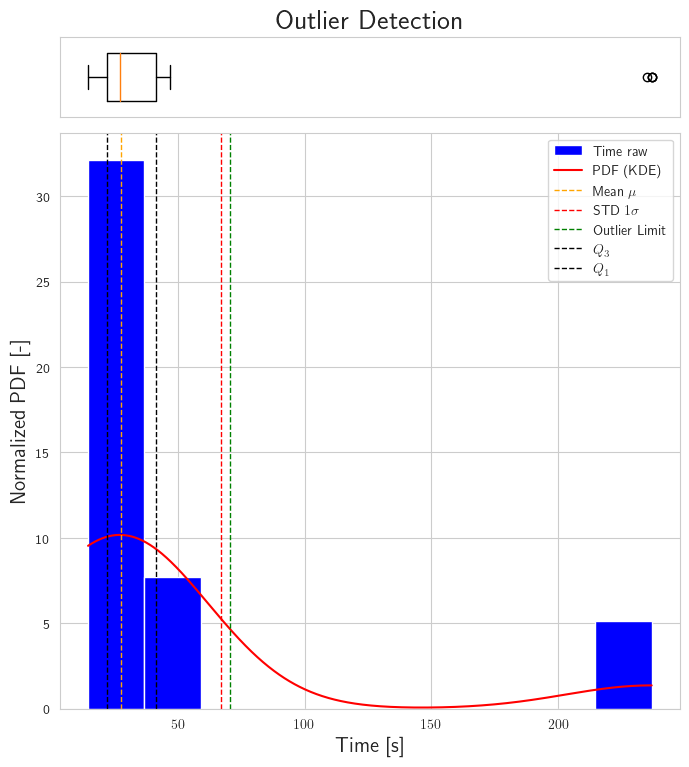

In [25]:
x_values1 = np.linspace(14.58, 237, 1000)
smoothed_gamma1 = kde(x_values1)
# Create subplots
fig, ax_main = plt.subplots(figsize=(8, 8))
fig.subplots_adjust(top = 0.83)

# Scatter plot in the main figure
ax_main.hist(gg[:], bins=10, density=True, alpha=1, color='blue', label='Time raw')
ax_main.plot(x_values1, smoothed_gamma1, color='red', label='PDF (KDE)')
#ax_main.histplot(data, bins=8, kde=True, color='g', edgecolor='black',label="Time data")
# Create a boxplot on top
ax_box = fig.add_axes([ax_main.get_position().x0, ax_main.get_position().y1 + 0.02,
                        ax_main.get_position().width, 0.1])
ax_box.boxplot(gg[:], widths=0.6, vert=False)

#ax_main.plot(x_values, smoothed_gamma, color='red', label='PDF') #PDF=probability density function
ax_main.axvline(mean, color='orange', linestyle='--', linewidth=1,label=r"Mean $\mu$")
ax_main.axvline(std_dev1, color='red', linestyle='--', linewidth=1,label=r"STD $1 \sigma$")
ax_main.axvline(outl1, color='green', linestyle='--', linewidth=1,label=r"Outlier Limit")
ax_main.axvline(q3, color='black', linestyle='--', linewidth=1,label=r"$Q_3$")
ax_main.axvline(q1, color='black', linestyle='--', linewidth=1,label=r"$Q_1$")
ax_main.set_xlabel('Time [s]',size=15)
ax_main.set_ylabel('Normalized PDF [-]',size=15)
ax_main.legend()

ax_main.set_labely = ['0','5','10' ,'15','20','25','30'] #ho moltiplicato x1000 la scala delle y
y=[0.000,0.005,0.010,0.015,0.020,0.025,0.030]               #punti in cui posizionare le nomenclature di "labely"
ax_main.set_yticks(y, labely)


ax_box.set_yticks([])
ax_box.set_xticks([])  # Remove x-axis ticks from the box plot
ax_box.set_title("Outlier Detection",weight='bold',size=20)
#plt.subplots_adjust(top=0.9)
#fig.savefig("Hist2.pdf", dpi=300)
plt.show()

In [26]:
f = kde.covariance_factor()
bw = f * sample.std()
scotts_factor = kde.scotts_factor()
scotts_factor


0.4911186099187366

Probabile grafico finale:

In [27]:
std_dev = np.std(data) #Deviazione standard
Q3=0.6745*std_dev #terzo quartile
Q1=-0.6745*std_dev
IQR=Q3-Q1
outl=Q3+1.5*IQR #outlier
std_dev

64.79711460510853

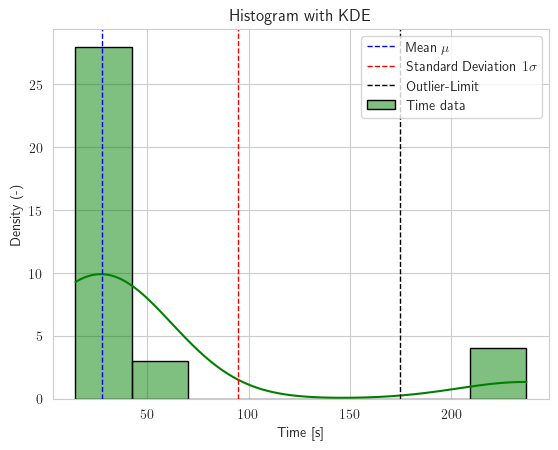

In [28]:
data = sample
sns.set_style("whitegrid")
ax = sns.histplot(data, bins=8, kde=True, color='g', edgecolor='black',label="Time data")
std_dev = np.std(data)
mean=np.mean(dfg.iloc[:-1,6])

# Add labels, title, and grid
plt.xlabel('Time [s]')
plt.ylabel('Density (-)')
plt.title('Histogram with KDE')
plt.axvline(mean, color='blue', linestyle='--', linewidth=1,label=r"Mean $\mu$")
plt.axvline(mean+std_dev, color='red', linestyle='--', linewidth=1,label=r"Standard Deviation $1 \sigma$")
plt.axvline(outl, color='k', linestyle='--', linewidth=1,label=r"Outlier-Limit")
plt.legend()
# Show the plot
plt.show()

# Fitting: sklearn

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#Data
y= dfg["Int. $\rho$"].to_numpy()
x = dfg["Reg(cm)"].to_numpy()
# Reshape x for sklearn
x = x.reshape(-1,1)
display(np.shape(y))
display(np.shape(x))

(8,)

(8, 1)

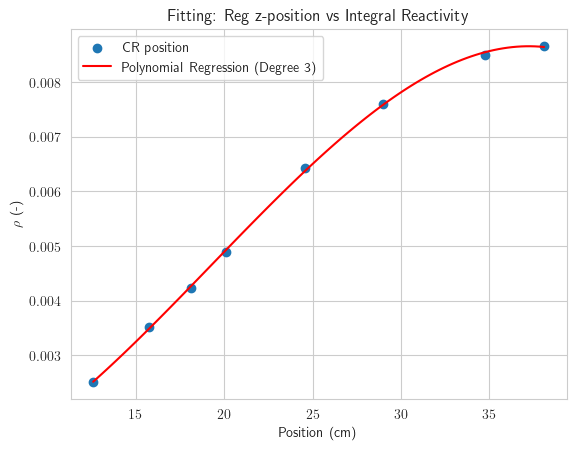

In [30]:
# Try polynomial regression
degree = 3  # Adjust the degree based on your data
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x, y)

# Generate predictions
x_pred = np.linspace(x[0,0], x[-1,0], 100).reshape(-1, 1)
y_pred = model.predict(x_pred)

# Plot the data and the fitted curve
plt.scatter(x, y, label='CR position')
plt.plot(x_pred, y_pred, label=f'Polynomial Regression (Degree {degree})', color='red')
plt.xlabel('Position (cm)')
plt.ylabel(r'$\rho$ (-)')
plt.title('Fitting: Reg z-position vs Integral Reactivity')
plt.legend()
plt.show()